%% [Markdown]<br>
## This file examines the population of Iranian students at various levels of education.<br>
%%<br>
 Import modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%%<br>
 Load the dataset

In [5]:
df = pd.read_excel("Iranian students of University.xlsx")
print(df.head())

        شرح      جمع  كارداني ( فوق ديپلم )  كارشناسي (ليسانس)  \
0   ٨7-١٣٨6  3391852                 766882            2407798   
1   ٨٨-١٣٨٧  3308692                 750583            2305928   
2  1388-89   3790878                1034850            2432730   
3   90-١٣٨9  4116593                1053086            2680817   
4   ٩١-١٣٩٠  4459287                1029388            2922935   

   كارشناسي ارشد (فوق ليسانس)  دكتراي تخصصي و حرفه‌اي  
0                      146605                   70567  
1                      179880                   72301  
2                      238603                   84695  
3                      290679                   92011  
4                      406168                  100796  


%%

In [6]:
print(df.columns)

Index(['شرح', 'جمع', 'كارداني ( فوق ديپلم )', 'كارشناسي (ليسانس)',
       'كارشناسي ارشد (فوق ليسانس)', 'دكتراي تخصصي و حرفه‌اي'],
      dtype='object')


%%<br>
 Changing names of columns

In [7]:
df.columns = ["year", "sum", "Pdiploma", "Bachelor", "MA", "Doctor"]

%%<br>
 Change 'year' column by better format.

In [8]:
df["year"] = [
    "1386-1387",
    "1387-1388",
    "1388-1389",
    "1389-1390",
    "1390-1391",
    "1391-1392",
    "1392-1393",
    "1393-1394",
    "1394-1395",
    "1395-1396",
    "1396-1397",
]

In [9]:
df.index = df["year"]
del df["year"]

%%<br>
 Data information

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1386-1387 to 1396-1397
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sum       11 non-null     int64
 1   Pdiploma  11 non-null     int64
 2   Bachelor  11 non-null     int64
 3   MA        11 non-null     int64
 4   Doctor    11 non-null     int64
dtypes: int64(5)
memory usage: 528.0+ bytes
None


%%<br>
 plotting def

In [11]:
def bar_plot(data, title, X_label, Y_label):
    """
    data : The data set that had one row and one column
    title : name of plot
    X_label : name of 'x' axis
    Y_label : name of 'y' axis
    """
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.xticks(rotation=60)
    sns.set_style("darkgrid")
    sns.barplot(
        x=data.index,
        y=data.values,
        palette="Set2",
        width=0.8,
    )
    plt.tight_layout()
    return plt.show()

In [12]:
def line_plot(data, title, X_label, Y_label):
    """
    data : The data set that had one row and one column
    title : name of plot
    X_label : name of 'x' axis
    Y_label : name of 'y' axis
    """
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.xticks(rotation=60)
    sns.set_style("darkgrid")
    sns.lineplot(x=data.index, y=data.values, color="b")
    plt.tight_layout()
    return plt.show()

In [13]:
def scatter_plot(data, title, X_label, Y_label):
    """
    data : The data set that had one row and one column
    title : name of plot
    X_label : name of 'x' axis
    Y_label : name of 'y' axis
    """
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.xticks(rotation=60)
    sns.set_style("darkgrid")
    sns.scatterplot(x=data.index, y=data.values, color="b")
    plt.tight_layout()
    return plt.show()

In [14]:
def hist_plot(data, title, X_label, Y_label, bins=5):
    """
    data : The data set that had one row and one column
    title : name of plot
    X_label : name of 'x' axis
    Y_label : name of 'y' axis
    bins : distance of each band
    """
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.xticks(rotation=60)
    sns.set_style("darkgrid")
    sns.histplot(x=data.index, y=data.values, bins=bins, kde=True)
    plt.tight_layout()
    return plt.show()

%%<br>
 Line plot of any grade

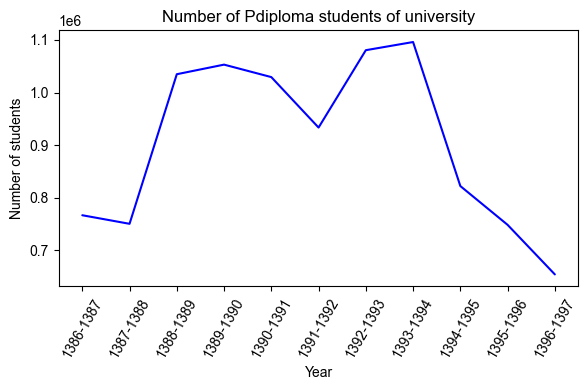

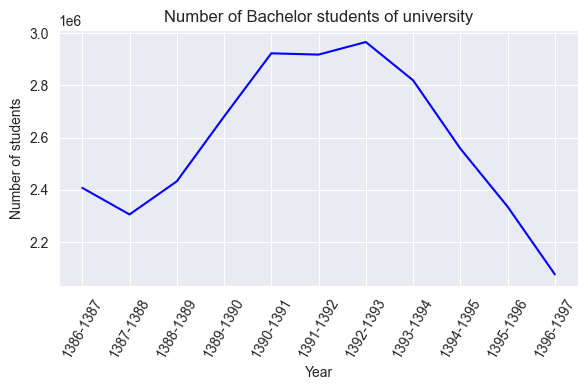

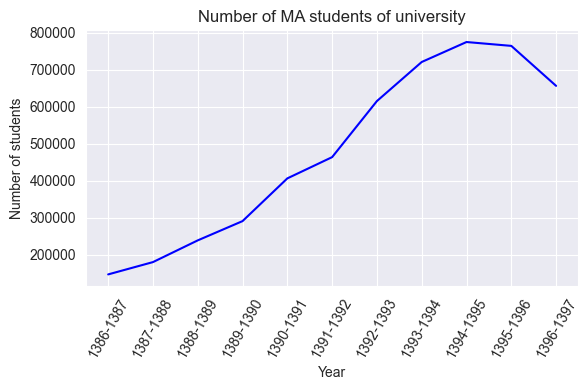

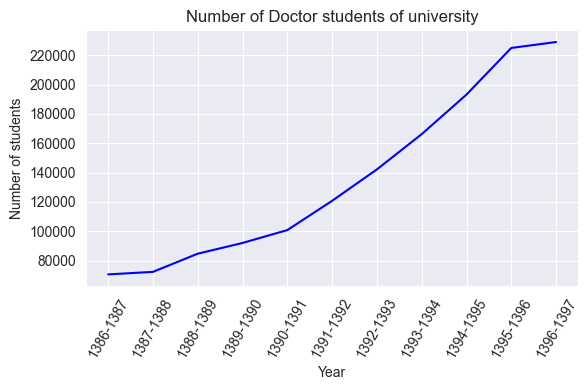

In [15]:
feature = ["Pdiploma", "Bachelor", "MA", "Doctor"]
for i in feature:
    line_plot(
        df[i],
        f"Number of {i} students of university",
        "Year",
        "Number of students",
    )

%%<br>
 Yearly Growth Rate of Students by Grade

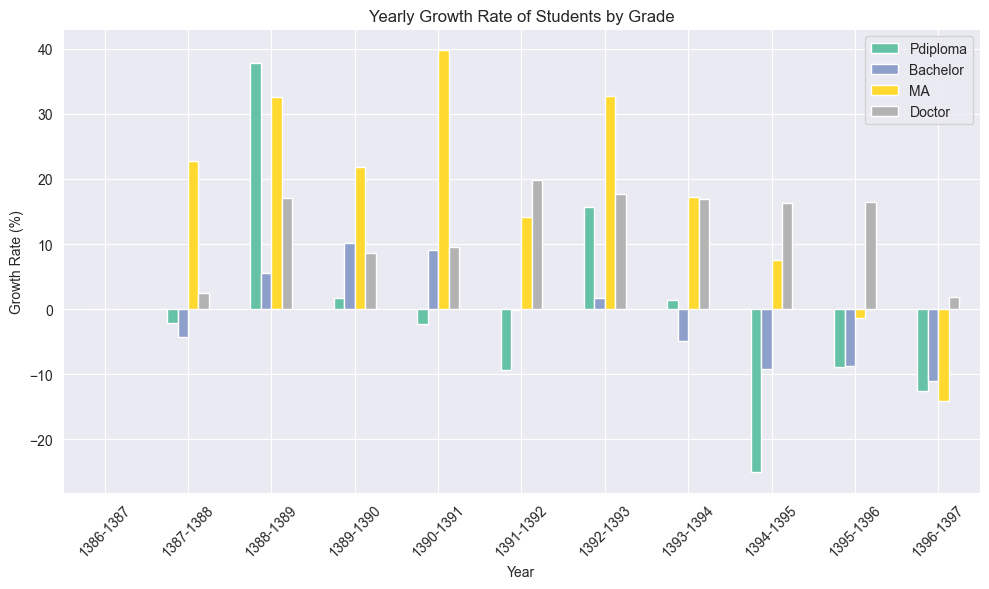

In [16]:
df_growth = df[["Pdiploma", "Bachelor", "MA", "Doctor"]].pct_change() * 100
df_growth.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Yearly Growth Rate of Students by Grade")
plt.ylabel("Growth Rate (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

%%<br>
 Yearly Growth Rate of Students at all

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5320\1347628583.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


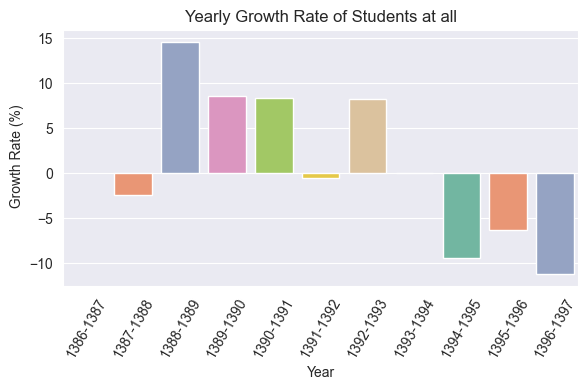

In [17]:
df_sum_growth = df["sum"].pct_change() * 100
bar_plot(
    df_sum_growth,
    "Yearly Growth Rate of Students at all",
    "Year",
    " Growth Rate (%)",
)
# %%
#: Add percent of any grade at all
for i in feature:
    df[f"{i}/sum"] = (df[i] * 100) / df["sum"]

 Plot a stacked area chart showing how the percentage of students in each grade level changes over time.

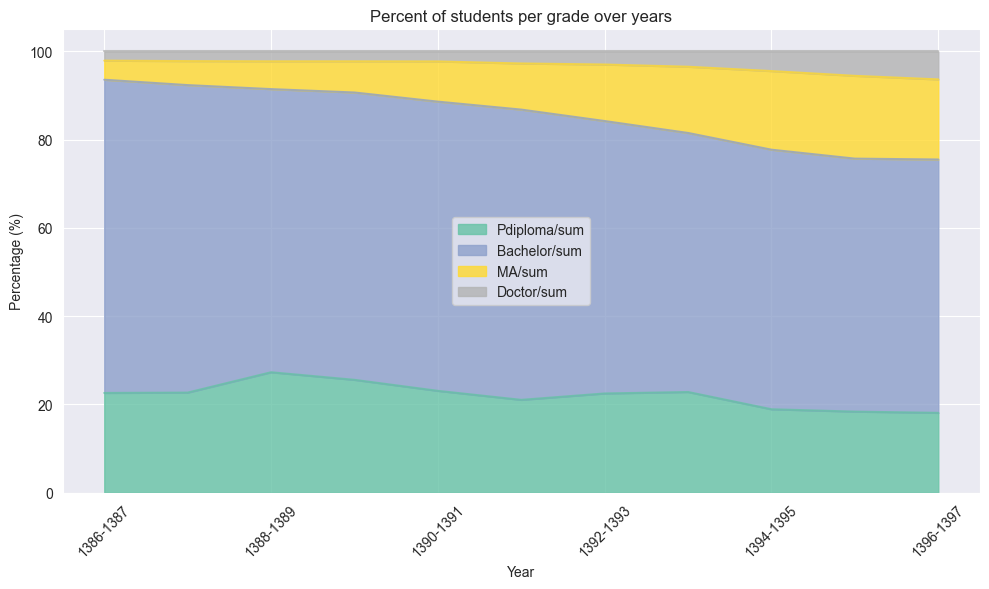

In [18]:
df_percent = df[[f"{i}/sum" for i in feature]]
df_percent.plot.area(figsize=(10, 6), colormap="Set2", alpha=0.8)
plt.title("Percent of students per grade over years")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

%%<br>
 Visualize the percentage share of each education level over the years using a heatmap.<br>
 This highlights patterns and fluctuations in student distribution across time.

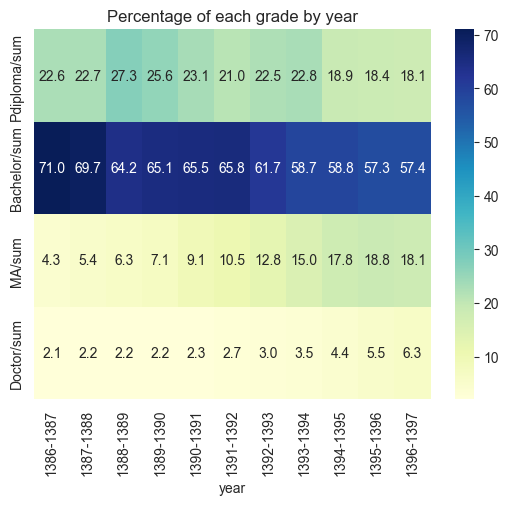

In [19]:
sns.heatmap(df_percent.T, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage of each grade by year")
plt.show()

%%<br>
 LinearRegression model

In [ ]:
x = np.array([range(1386, 1397)]).reshape(-1, 1)
y = df["sum"]

In [ ]:
Ir = LinearRegression()
model = Ir.fit(x, y)
y_pred = model.predict(x)

%%<br>
 Scatter plot of real data and line plot of Regression model

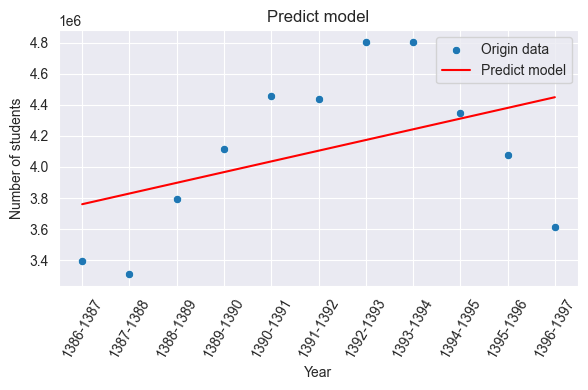

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Predict model")
plt.xlabel("Year")
plt.ylabel("Number of students")
plt.xticks(rotation=60)
sns.set_style("darkgrid")
sns.scatterplot(data=df, x=df.index, y=df["sum"].values, label="Origin data")
sns.lineplot(x=df.index, y=y_pred, color="r", label="Predict model")
plt.tight_layout()
plt.legend()
plt.show()

Linear Regression cannot predict effectively.

%%<br>
 Correlation between columns elements

<Axes: >

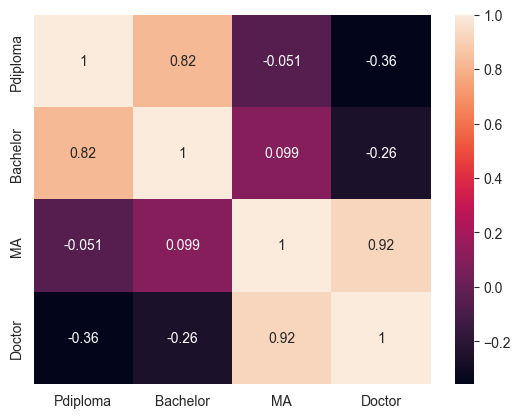

In [23]:
sns.heatmap(df[["Pdiploma", "Bachelor", "MA", "Doctor"]].corr(), annot=True)

%%<br>
## [Markdown]<br>
> There is a significant relationship between the number of master's and doctoral students.<br>
> There is a significant relationship between the number of associate and bachelor's degree students.

%%<br>
 Vibration in recent year in any grade

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5320\1347628583.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


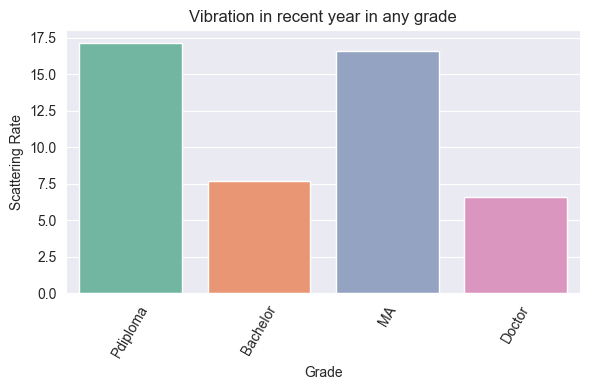

In [24]:
bar_plot(
    df_growth.std(), "Vibration in recent year in any grade", "Grade", "Scattering Rate"
)
# %%
# ## [Markdown]
#: Most vibration was in 'Pdiploma' & 'MA' grades.

%%